# PreFRBLE + Magnetizer

## Initial exploration/checking

Checks on the first 5 small volumes before resubmission of the large runs

### Basic imports and setup

In [1]:
%matplotlib inline
import sys, os, os.path
import numpy as np
sys.path.append('/home/lrodrigues/Magnetizer/python/')
import matplotlib.pyplot as plt
import seaborn as sns
import magnetizer.prepare_pandas
import astropy.units as u
import astropy.constants as c
import magnetizer
import magnetizer.visualization as visu

In [2]:
import matplotlib as mpl
mnras_column_size = 3.32153
mnras_text_size = 6.97522
mpl.rcParams['figure.figsize'] = [mnras_text_size, mnras_text_size/2.]
mpl.rcParams['figure.dpi'] = 200
# mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble']=[r'\usepackage{amsmath,newtxmath}']

In [3]:
nvols = 40

input_files_a = ['/home/lrodrigues/storage/magnetizer_inputs/Lacey14_{}_corr.hdf5'.format(i) 
               for i in range(1,nvols+1) if i not in [0]] #ivol=3 file got currupted and will be ignored
output_files_a = ['/scratch/lrodrigues/mag_outputs/Lacey14_{}_corr.hdf5'.format(i) 
                for i in range(1,nvols+1) if i not in [0]]

input_files = []; output_files = []
for i, o in zip(input_files_a, output_files_a):
    
    try:
        r = magnetizer.MagnetizerRun(output_path=o, input_path=i, verbose=False)    
#         print('a')
        r.get('LoS_theta',0)
        input_files.append(i); output_files.append(o)
    except:
        print('Skipping', o)

run = magnetizer.MagnetizerRun(output_path=output_files, 
                               input_path=input_files, verbose=True)

Problem with ivol: 0 iz: 44
Skipping /scratch/lrodrigues/mag_outputs/Lacey14_10_corr.hdf5
Problem with ivol: 0 iz: 44
Skipping /scratch/lrodrigues/mag_outputs/Lacey14_12_corr.hdf5
Problem with ivol: 0 iz: 44
Skipping /scratch/lrodrigues/mag_outputs/Lacey14_14_corr.hdf5
Problem with ivol: 0 iz: 44
Skipping /scratch/lrodrigues/mag_outputs/Lacey14_16_corr.hdf5
Problem with ivol: 0 iz: 44
Skipping /scratch/lrodrigues/mag_outputs/Lacey14_18_corr.hdf5
Problem with ivol: 0 iz: 44
Skipping /scratch/lrodrigues/mag_outputs/Lacey14_20_corr.hdf5
Problem with ivol: 0 iz: 44
Skipping /scratch/lrodrigues/mag_outputs/Lacey14_24_corr.hdf5
Problem with ivol: 0 iz: 44
Skipping /scratch/lrodrigues/mag_outputs/Lacey14_30_corr.hdf5


In [4]:
run.show_outputs()

Quantity    Units        Description
---------   ----------   -----------------------------------
Bavg        microgauss   Surface average magnetic field
Beavg       microgauss   "Energy averaged" magnetic field
Bmax        microgauss   Maximum B
Bmax_idx                 Index of maximum |B|
Bp          microgauss   
Br          microgauss   
Bzmod       microgauss   
DM          pc cm^-3     Dispersion measure along a random LoS
FRB_DM      pc cm^-3     Dispersion measure along a random LoS
FRB_LoS_counts             Number of sighlines used
FRB_LoS_thetaradians      Inclination (for observables calculation)
FRB_LoS_y                Impact parameter used in the RM calculation in units of rmax
FRB_LoS_z                Impact parameter used in the RM calculation in units of rmax
FRB_RM      rad/m^2      Rotation measure along a random LoS
FRB_SM      kpc m^-{20/3}Scattering measure along a random LoS
FRB_column_denscm^-2        Column density of warm neutral gas
FRB_column_densitycm^-2 

In [5]:
print('Number of subvolume:',np.unique(run.ivol).size)
print('Number of galaxies:',run.ngals)

Number of subvolume: 32
Number of galaxies: 1011667


In [59]:
# Removes any NaNs
valid = lambda x : x[np.isfinite(x)]

def create_latex_label(quantity, name='', log=False):
    """
    Automatically creates a LaTeX label from an astropy.Quantity
    """
    str_unit = quantity.unit._repr_latex_().replace('$','')
    
    if not log:
        label = r'$ {} ' .format(name)
        if str_unit in ('', '\\mathrm{}'):
            label += '$'
        else:
            label += r'\;[ {} ]$'.format(str_unit)
                                
    else:
        label = r'$\log\left( {} '.format(name)
        if str_unit in ('', '\\mathrm{}'):
            label += '\right)$'
        else:
            label += r'\, /\, {} \right)$'.format(str_unit)
    return label


def plot_distribution(x, name='', unit=None, log=False,
                     **kwargs):
    """
    Plots distribution using 
    """
    x = u.Quantity(x)
    if unit is not None:
        x = x.to(unit)
    
    if not log:
        sns.distplot(valid(x.value),**kwargs)
    else:
        sns.distplot(valid(np.log10(x.value)),**kwargs)
    
    label = create_latex_label(x, name=name, log=log)
    
    if 'ax' in kwargs:
        kwargs['ax'].set_xlabel(label)
    else:
        plt.xlabel(label)

## Warm-up global plots

**Sanity check**, for $\theta$, $y_{\rm sky}$ and $z_{\rm sky}$



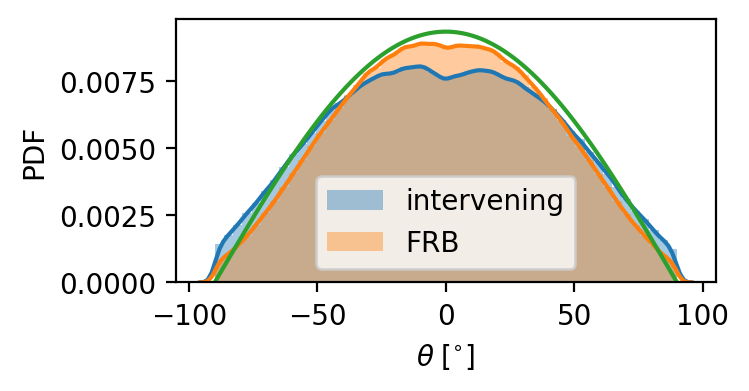

In [61]:
fig, ax1 = plt.subplots(ncols=1, sharey=True, 
                        figsize=(mnras_text_size/2.,mnras_text_size/4.))
plot_distribution(run.get('LoS_theta',0), r'\theta', u.deg, ax=ax1, 
                  label='intervening')
plot_distribution(run.get('FRB_LoS_theta',0), r'\theta', u.deg, ax=ax1,
                  label='FRB')
ax1.set_ylabel('PDF'); ax1.legend();

t = np.linspace(-90,90,100)
plt.plot(t, np.cos(np.radians(t))/107)

Loading LoS_y at z=-5.960464477539063e-08
Loading LoS_z at z=-5.960464477539063e-08
Loading FRB_LoS_y at z=-5.960464477539063e-08
Loading FRB_LoS_z at z=-5.960464477539063e-08


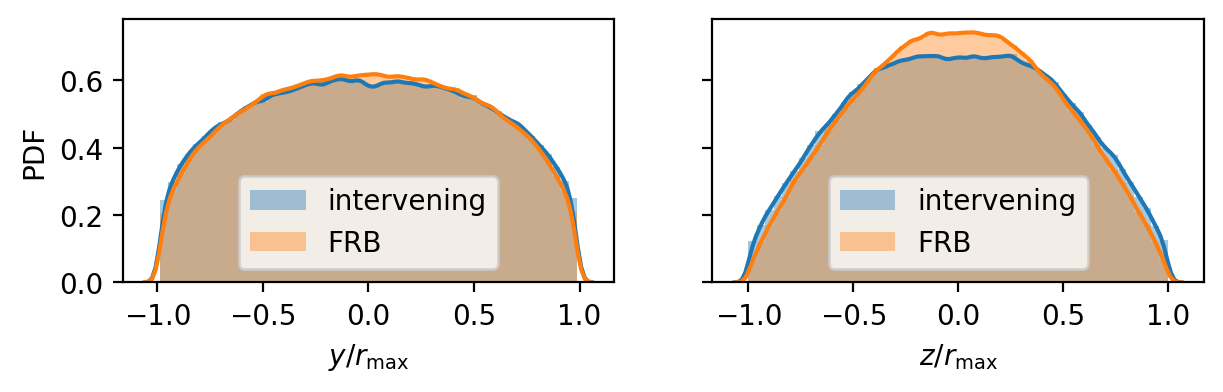

In [8]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,
                              figsize=(mnras_text_size,mnras_text_size/4.))

plot_distribution(run.get('LoS_y',0), r'y/r_{\rm max}', ax=ax1, 
                  label='intervening')
plot_distribution(run.get('LoS_z',0), r'z/r_{\rm max}', ax=ax2, 
                  label='intervening')

plot_distribution(run.get('FRB_LoS_y',0), r'y/r_{\rm max}', ax=ax1, 
                  label='FRB')
plot_distribution(run.get('FRB_LoS_z',0), r'z/r_{\rm max}', ax=ax2, 
                  label='FRB')
ax1.set_ylabel('PDF'); ax1.legend(); ax2.legend();

## Weighted histograms

What we mean by weighted likelihood is a histogram constructed in the following way: for each bin $i$ of a quantity, the histogram is constructed summing up the relative weights associated with that quantity. I.e.

$$h_i = \frac{\sum_j^{{\rm bin}\,i}  w_{j}}{\sum_i\sum_j^{{\rm bin}\,i}  w_{j}} $$

it should be noted that all the galaxy occupy the 

In [165]:
def weighted_histogram(quantity, weight_quantity, bins=100): 
    """
    Constructs a histogram where the counts are weighted by 
    `weight_quantity`
    """
    qmax = max(valid(quantity)); qmin = min(valid(quantity))

    if type(bins) == int:
        bin_edges = np.linspace(qmin, qmax, nbins)
    else:
        bin_edges = bins

    bin_centres = (bin_edges[:-1]+bin_edges[1:])/2

    hist = []
    for bmin, bmax in zip(bin_edges[:-1], bin_edges[1:]):
        bin_value = 0
        for q in quantity:
            # Creates a mask for the bin
            select = (q < bmax)*(q > bmin)
            # Sums over the weight associated with that bin
            bin_value += np.nansum(weight_quantity[select])

        hist.append(bin_value)
    
    # Converts to numpy array
    hist = np.array(hist)
    # Divides all bins by the total sum of weights
    hist /= np.nansum(weight_quantity)
    
    return hist, bin_centres

In [69]:
def plot_weighted_distribution(x, weight_quantity, name='', unit=None, log=False,
                               custom_norm=1., **kwargs):
    """
    Plots weighted distribution, adjusting the axis labels  accordingly
    """
    
    x = u.Quantity(x)
    if unit is not None:
        x = x.to(unit)
    
    
    label = create_latex_label(x, name=name, log=log)
    
    q = x.value
    if log:
        q = np.log10(q)
    
    if hasattr(weight_quantity, 'value'):
        weight_quantity = weight_quantity.value
        
    hist, bin_centres = weighted_histogram(q, weight_quantity)
    
    plt.plot(bin_centres, hist*custom_norm, drawstyle='steps-mid', **kwargs)
    
    if 'ax' in kwargs:
        kwargs['ax'].set_xlabel(label)
    else:
        plt.xlabel(label)

To check whether this is working, let us plot the DM using the new weighted distribution function but with equal weights and compare with the simpler earlier plotting tools

/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


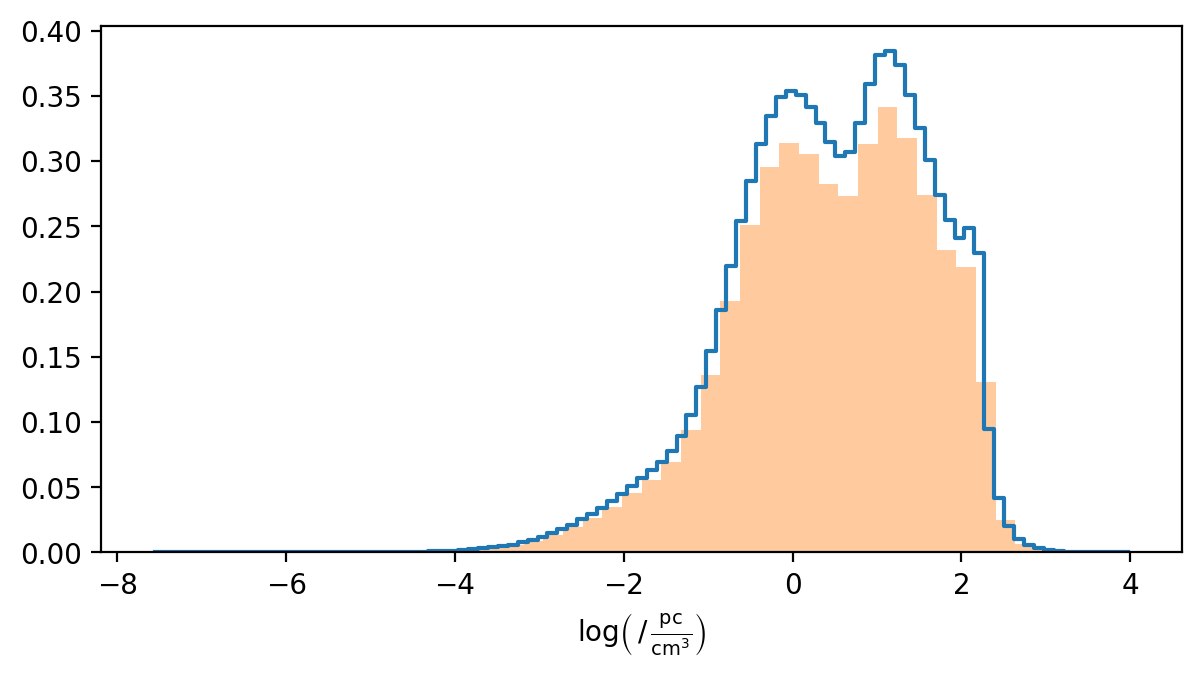

In [72]:
z = 0
a = run.get('r_disk', z).value
weight_quantity = np.where(np.isfinite(a), 1, np.nan )
quantity = run.get('DM', z)

plot_weighted_distribution(quantity, weight_quantity, log=True)
plot_distribution(run.get('DM',z), log=True, kde=False, norm_hist=True)

This seems ok

In [94]:
names_dict = {'RM': r'\rm RM_{\rm int}',
              'DM': r'\rm DM_{\rm int}',
              'SM': r'\rm SM_{\rm int}',
              'FRB_RM': r'\rm RM_{\rm FRB}',
              'FRB_DM': r'\rm DM_{\rm FRB}',
              'FRB_SM': r'\rm SM_{\rm FRB}',}

/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log10
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in log10
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log10
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountere

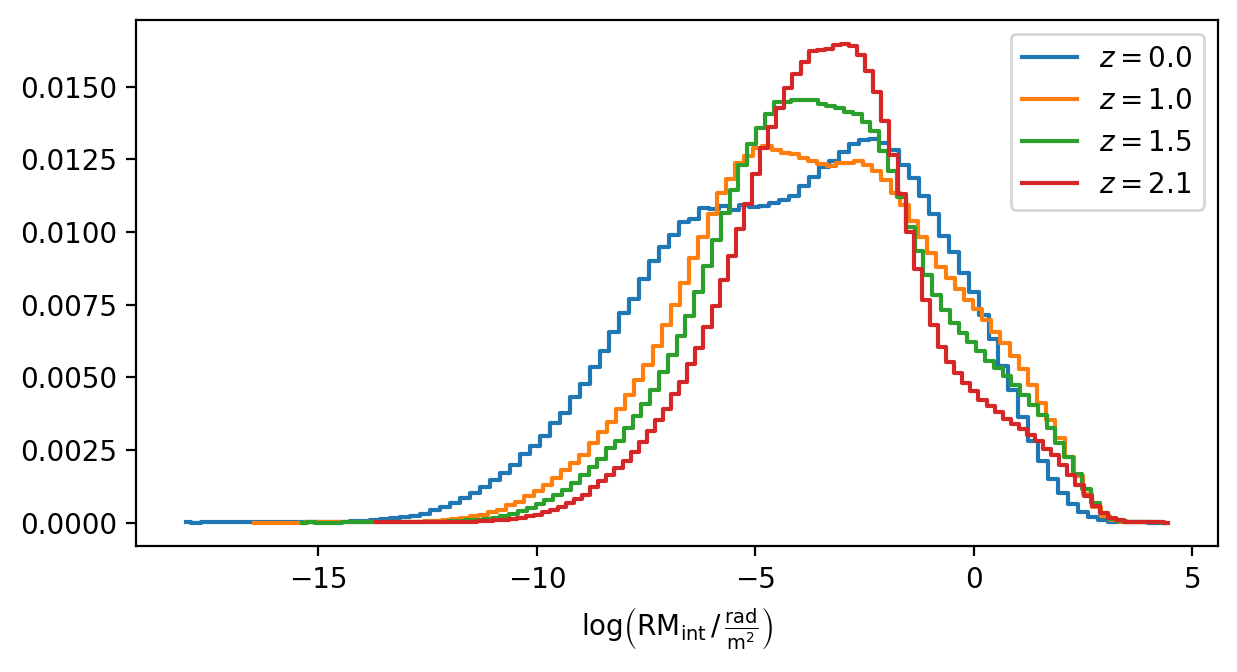

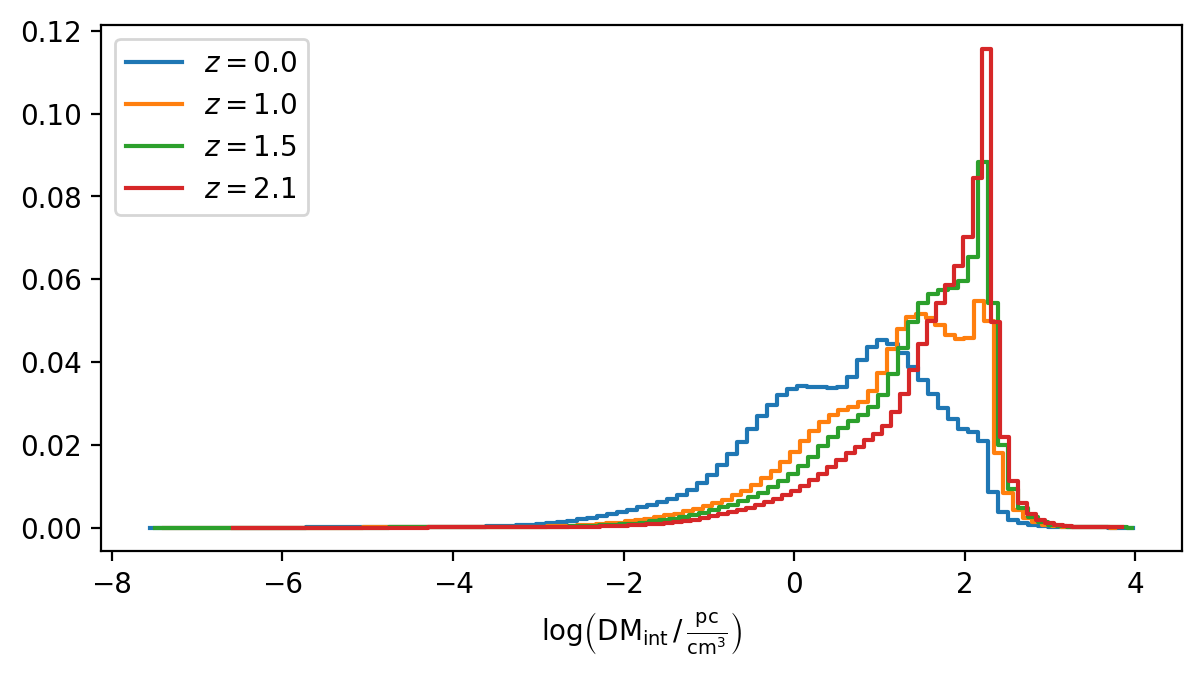

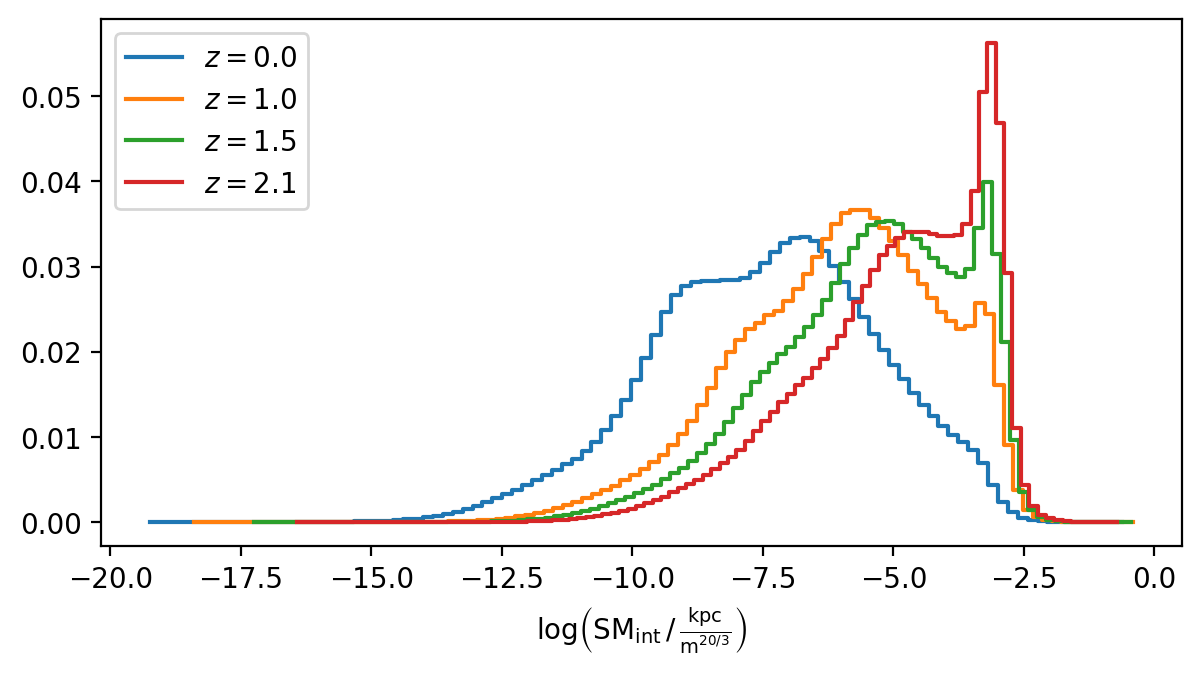

In [95]:
for name in ('RM', 'DM', 'SM'):
    plt.figure()
    for z in (0,0.98,1.5,2.07):
        quantity = run.get(name, z)

        # Accounts for the fact that 10 LoS are shot to each galaxy
        custom_norm = 1/ 10
        # Alternatively, uses the average LoS counts
        # custom_norm = 1/np.nanmean(run.get('LoS_counts',0)[run.get('LoS_counts',0)>0])

        weight = run.get('r_disk', z)

        
        plot_weighted_distribution(quantity, weight, name=names_dict[name], log=True,
                                   custom_norm=custom_norm, label='$z={0:.1f}$'.format(z))

    plt.legend()

/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipy

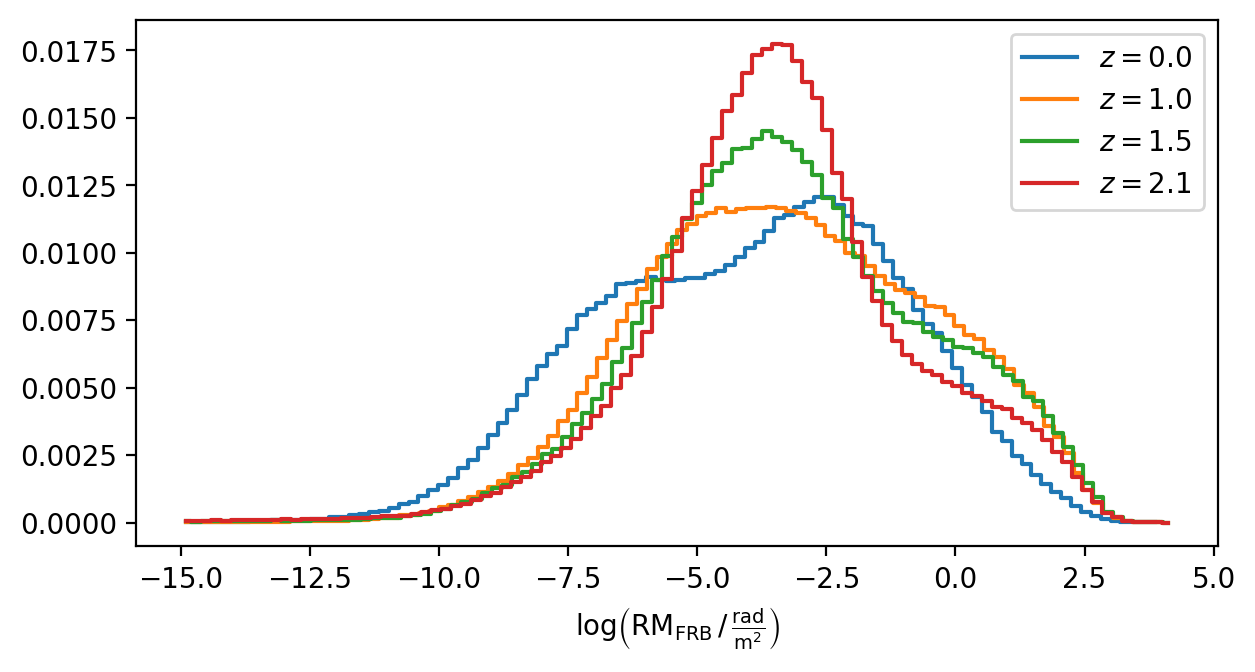

/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipy

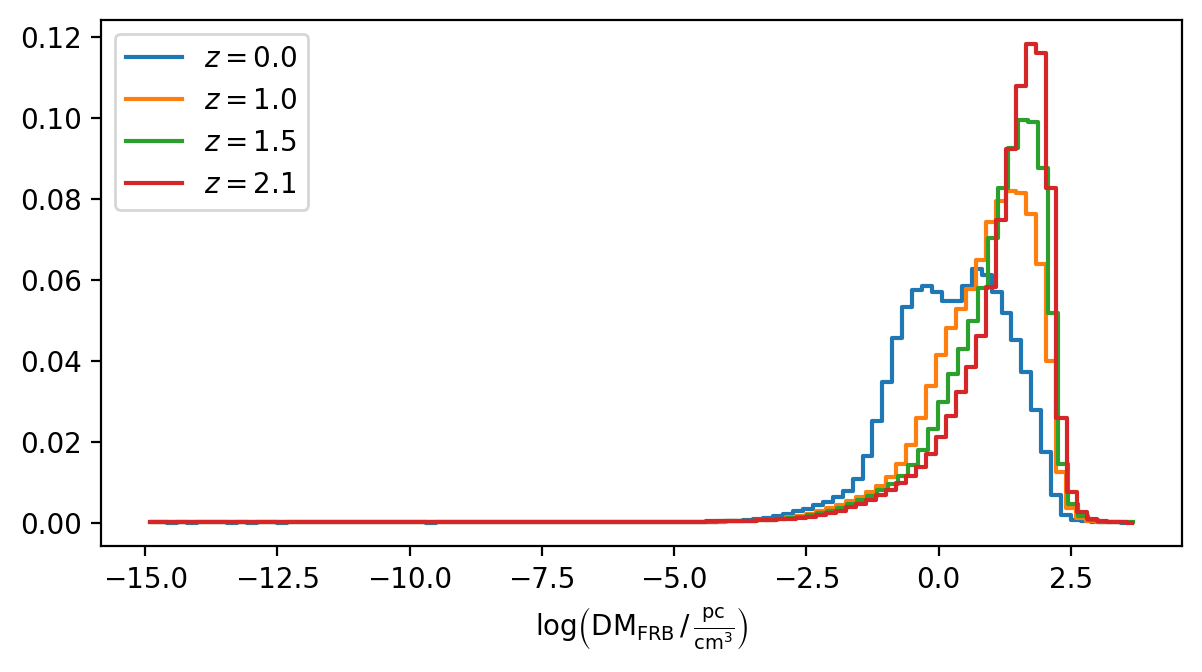

/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipy

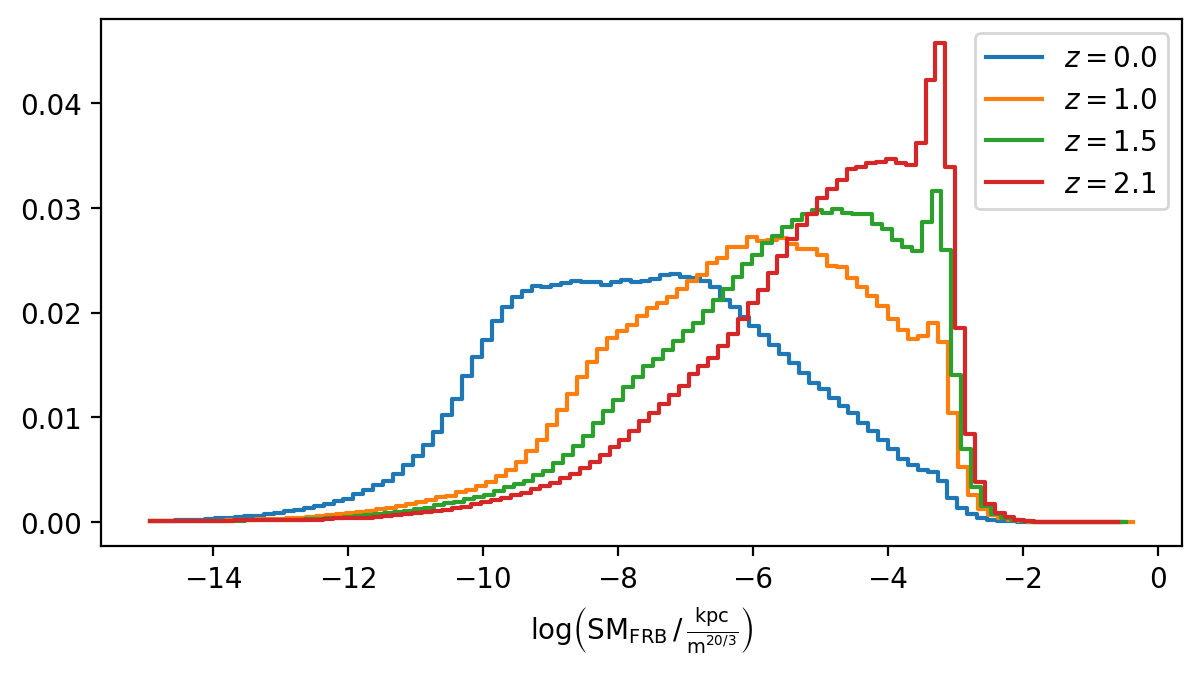

In [109]:
for name in ('FRB_RM', 'FRB_DM', 'FRB_SM'):
    plt.figure()
    for z in (0,0.98,1.5,2.07):
        quantity = run.get(name, z)
        # Cuts the tails
        quantity = np.where(quantity.value>1e-15, quantity, np.nan)

        # Accounts for the fact that 10 LoS are shot to each galaxy
        custom_norm = 1/ 10
        # Alternatively, uses the average LoS counts
        # custom_norm = 1/np.nanmean(run.get('LoS_counts',0)[run.get('LoS_counts',0)>0])

        weight = run.get('Mstars_disk', z) # only the disk or disk and bulge?

        
        plot_weighted_distribution(quantity, weight, name=names_dict[name], log=True,
                                   custom_norm=custom_norm, label='$z={0:.1f}$'.format(z))

    plt.legend()
    plt.show()

In [156]:
z_target = sorted(list(np.arange(0,3,0.3))+[0,1,1.5,2])
zs = run.redshifts[np.unique(visu.closest_indices(run.redshifts, z_target))][::-1]
print('redshifts:','  '.join([ '{0:.2f}'.format(abs(z)) for z in zs]), '  N =',len(zs))

redshifts: 0.00  0.32  0.62  0.91  0.99  1.17  1.50  1.77  2.07  2.42  2.62   N = 11


In [160]:
for z in zs:
    for name in ('r_disk', 'FRB_RM', 'FRB_DM', 'FRB_SM','Mstars_disk','RM','DM','SM'):
        run.get(name, z)

Loading RM at z=2.6188602447509766
Loading DM at z=2.6188602447509766
Loading SM at z=2.6188602447509766


In [176]:
hist, bins = weighted_histogram(np.log10(run.get('RM',0).value),
                                weight_quantity=run.get('r_disk',0).value, 
                                bins=np.linspace(-5,2,20))

/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in greater


## Investigating the peak at $z=2$

In [195]:
SM = run.get('SM',2.07)
SM.shape

(10, 1011667)

In [196]:
# To simplify life (and indexing) lets use only one of the 10 LoS shot per galaxy
SM_s = SM[0]
SM_s[SM_s.value>10**-3.5].shape

/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


(220293,)

/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


Loading Bmax at z=2.0700299739837646


/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/home/lrodrigues/storage/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


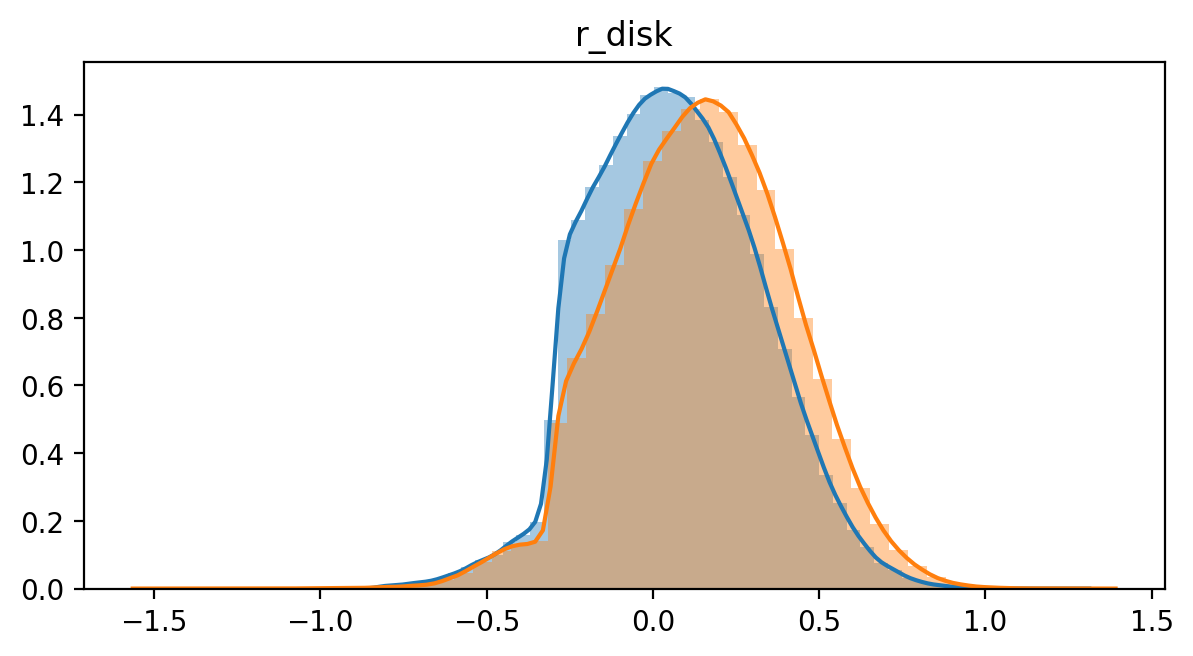

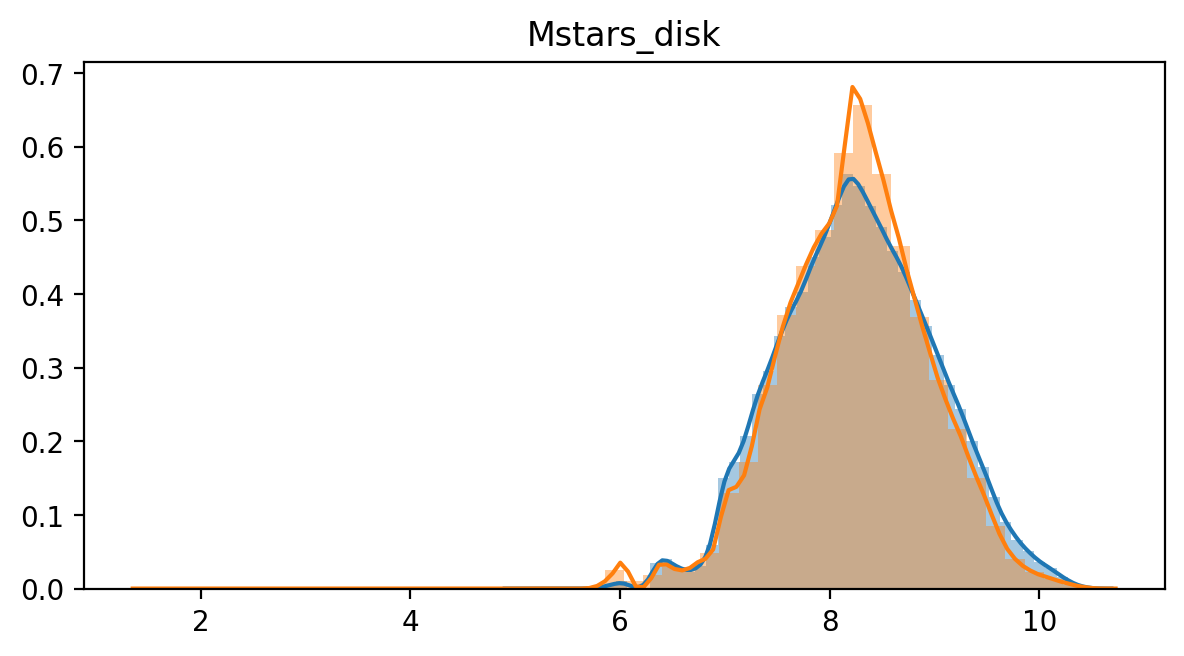

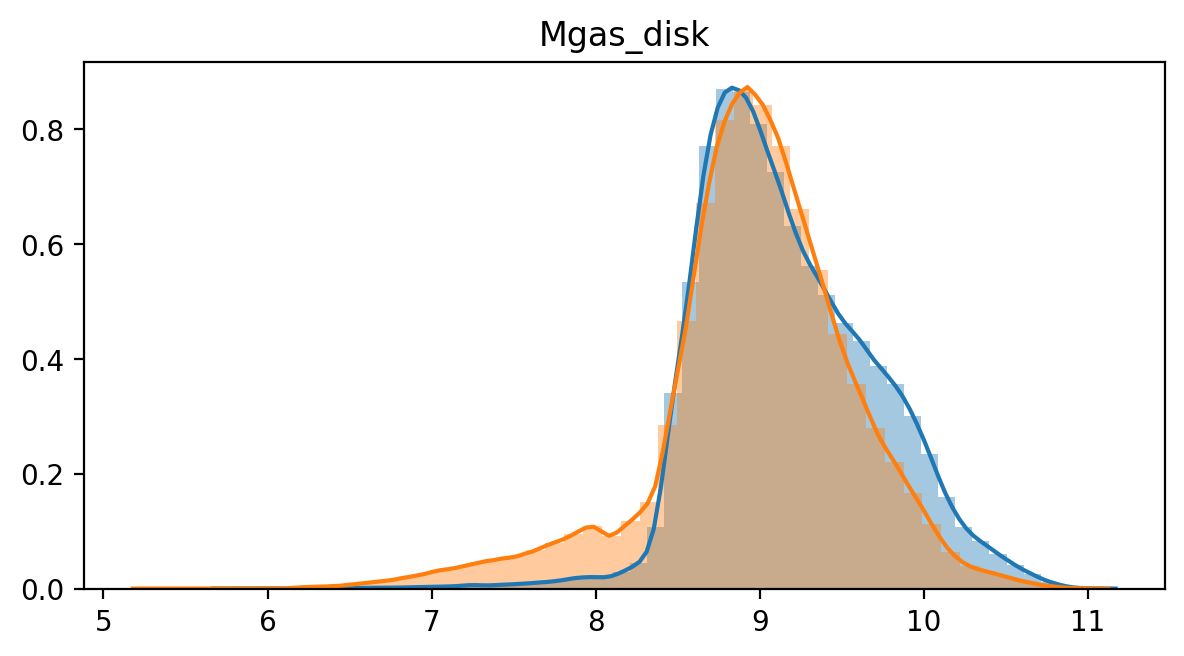

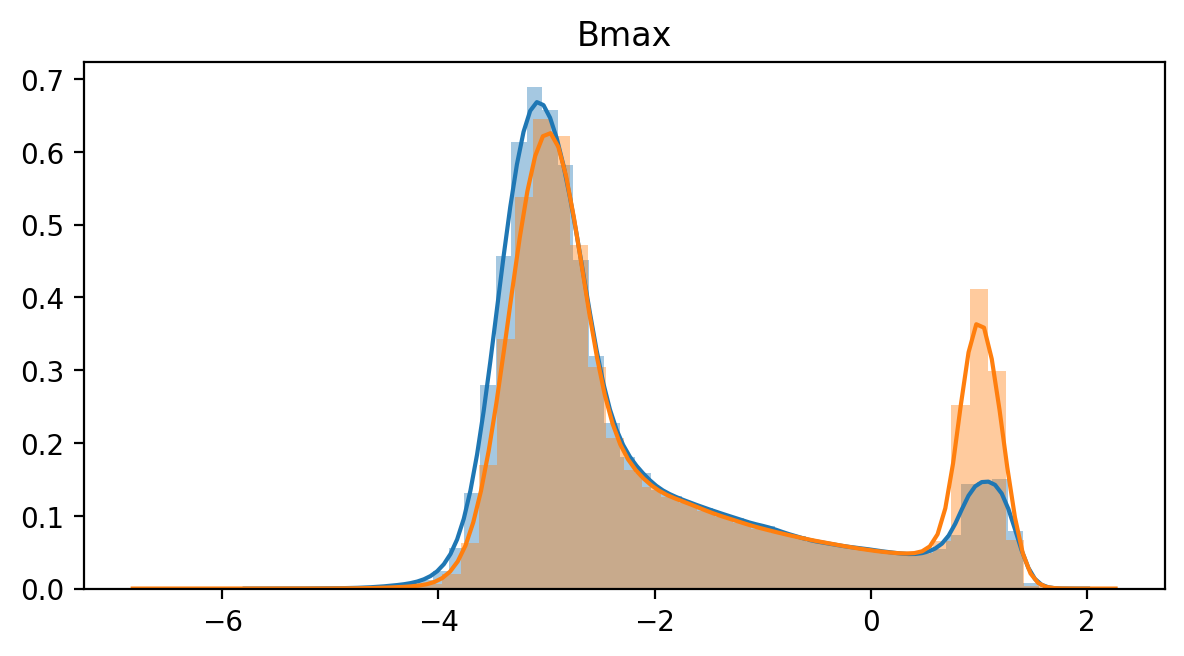

In [205]:
ok = SM_s.value>10**-3.5
for q in ['r_disk', 'Mstars_disk','Mgas_disk','Bmax']:
    plt.figure()
    plt.title(q)
    sns.distplot(valid(np.log10(run.get(q,2.07)[ok].value)))
    sns.distplot(valid(np.log10(run.get(q,2.07).value)))